In [1]:
# authors: 
# Aniket Narendra Patil ap8504@rit.edu, 
# Shreya Pramod  sp3045@rit.edu, 
# Disha Revandkar dr6742@rit.edu

#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Importing csv file to pandas DataFrame
df = pd.read_csv('appl_3_amazon_furniture.csv')

In [3]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,31-08-2015
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,31-08-2015
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",31-08-2015
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",31-08-2015
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,31-08-2015


C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


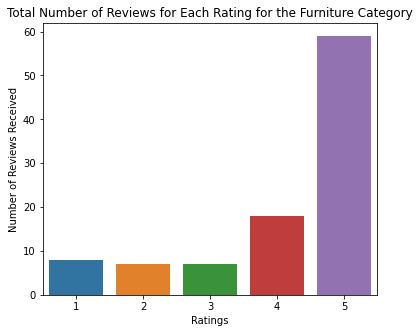

In [4]:
# Analysizing total number of reviews received against each star rating.
plt.figure(figsize = (6,5))
sns.countplot(df['star_rating'])
plt.title('Total Number of Reviews for Each Rating for the Furniture Category')
plt.xlabel('Ratings')
plt.ylabel('Number of Reviews Received')
plt.show()

In [5]:
#Converting date format to year
df['year'] = pd.DatetimeIndex(df['review_date']).year

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '31-08-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(


C:\Users\patil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


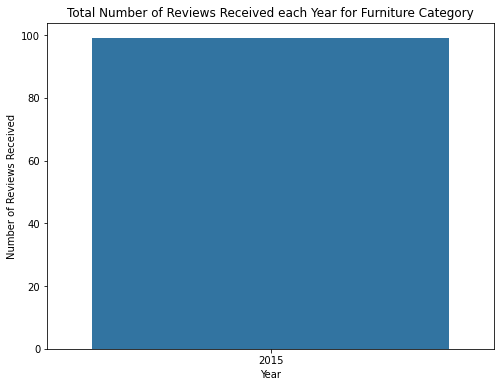

In [6]:
#Analyzing total number of reviews received year wise.
plt.figure(figsize = (8,6))
sns.countplot(df['year'])
plt.xlabel('Year')
plt.ylabel('Number of Reviews Received')
plt.title('Total Number of Reviews Received each Year for Furniture Category')
plt.show()

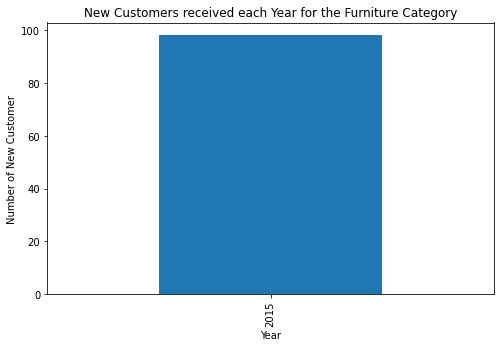

In [7]:
#Analyzing new customers year wise
new_customer = df.groupby('year')['customer_id'].nunique()
plt.figure(figsize = (8,5))
new_customer.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of New Customer')
plt.title('New Customers received each Year for the Furniture Category')
plt.show()

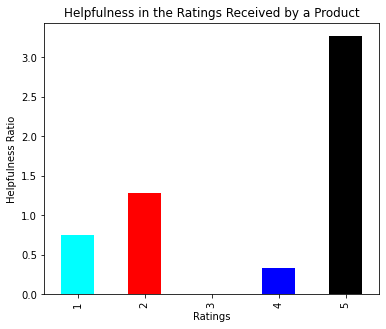

In [8]:
# Calculating the Helfulness ratio
plt.figure(figsize = (6,5))
df.groupby('star_rating')['helpful_votes'].mean().plot(kind='bar', color=['cyan', 'red', 'green', 'blue', 'black']) 
plt.title("Helpfulness in the Ratings Received by a Product")
plt.xlabel("Ratings")
plt.ylabel("Helpfulness Ratio")
plt.show()

In [9]:
#Classifying products as helpful or unhelpful.
df1 = df.copy()
def Helpful(x):
    if x['total_votes'] >= 1:
           return 'Y'
    else: 
           return 'N'

df1['helpful'] = df1.apply(Helpful, axis=1)

df1.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,helpful
0,US,24509695,R3VR960AHLFKDV,B004HB5E0E,488241329,Shoal Creek Computer Desk,Furniture,4,0,0,N,Y,... desk is very study and it i has a beautifu...,This desk is very study and it i has a beauti...,31-08-2015,2015,N
1,US,34731776,R16LGVMFKIUT0G,B0042TNMMS,205864445,Dorel Home Products Delaney Large Rectangular ...,Furniture,5,0,0,N,Y,Five Stars,Great item,31-08-2015,2015,N
2,US,1272331,R1AIMEEPYHMOE4,B0030MPBZ4,124663823,Bathroom Vanity Table Jewelry Makeup Desk Benc...,Furniture,5,1,1,N,Y,Five Stars,"Perfect fit for my bedroom, been wanting one s...",31-08-2015,2015,Y
3,US,45284262,R1892CCSZWZ9SR,B005G02ESA,382367578,Sleep Master Ultima Comfort Memory Foam 6 Inch...,Furniture,3,0,0,N,Y,Good enough,"We use this on a trundle bed. So, it does not...",31-08-2015,2015,N
4,US,30003523,R285P679YWVKD1,B005JS8AUA,309497463,"1 1/4"" GashGuards: Deluxe Rubberized Plastic B...",Furniture,3,0,0,N,N,Gash Gards for daybed,The product is fine...just seemed like it took...,31-08-2015,2015,N
